# Assignment 5

## 1. Synaptic Current
### a) Basic synaptic Current

In [107]:
import numpy as np
import matplotlib.pyplot as plt

initial_x = 0          # wtf is x really? (probably Siemens)
initial_g_syn = 0      # Siemens (oh didn't know that's a unit)
tao_syn = 10*10**-3    # seconds
tao_m = 10*10**-3      # seconds
res_m = 10**7          # ohm
g_star = 30*10**-9     # Siemens
e_m = -80*10**-3       # volts
res_m_ie = 0           # volts

e_syn_inh = -100*10**-3 # volts
e_syn_exc = 0 # volts

def synaptic_current(voltage, g_syn, mode="inh"):
    e_syn = e_syn_inh if mode == "inh" else e_syn_exc
    return g_syn*(voltage - e_syn)

def v_func(v, g_syn, synaptic_current_func, mode):
    e_syn = e_syn_inh if mode == "inh" else e_syn_exc
    return (1/tao_m) * (-1*v + e_m - res_m*synaptic_current_func(v, g_syn, mode=mode))

def x_func(x, on_off=0):
    return (-1*x + tao_syn*g_star*on_off) / tao_syn

def g_func(x, g_syn):
    return (x - g_syn) / tao_syn

def euler_voltage(initial_x, initial_g_syn, initial_v, t_max, dt, synaptic_current_func, mode="inh"):
    voltages = [initial_v]
    the_xs = [initial_x]
    the_gs = [initial_g_syn]
    t = dt
    t_spike = 10*dt
    while t < t_max:
        current_v = voltages[-1]
        current_x = the_xs[-1]
        current_g = the_gs[-1]
        if "{:.2f}".format(t) == "{:.2f}".format(t_spike):
            on_off = 1
        else:
            on_off = 0
        new_x = current_x + x_func(current_x, on_off=on_off)*dt
        # print("current_x: {}".format(current_x))
        # print("x_func(current_x, on_off=on_off): {}".format(x_func(current_x, on_off=on_off)))
        # print("x_func(current_x, on_off=on_off)*dt: {}".format(x_func(current_x, on_off=on_off)*dt))
        # print("new_x: {}".format(new_x))
        # print("dt: {}".format(dt))
        # print("------")
        new_g = current_g + g_func(current_x, current_g)*dt
        new_v = current_v + v_func(current_v, current_g, synaptic_current_func, mode)*dt
        voltages.append(new_v)
        the_gs.append(new_g)
        the_xs.append(new_x)    
        t += dt
    return the_xs, the_gs, voltages
 
dt = 10*10**-5
t_max = dt*1000

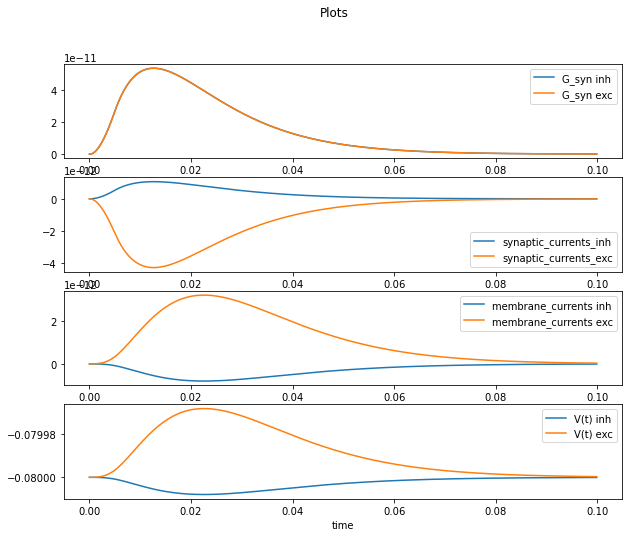

In [108]:
# Plotting
def membrane_current(voltage):
    return (voltage - e_m) / res_m

def plot_all(x_axis, the_xs, the_gs, voltages):
    synaptic_currents_inh = [synaptic_current(voltage, g_syn, mode="inh") for voltage, g_syn in zip(voltages[0], the_gs[0])]
    synaptic_currents_exc = [synaptic_current(voltage, g_syn, mode="exc") for voltage, g_syn in zip(voltages[1], the_gs[1])]
    membrane_currents_1 = [membrane_current(voltage) for voltage in voltages[0]]
    membrane_currents_2 = [membrane_current(voltage) for voltage in voltages[1]]

    fig, axs = plt.subplots(4, figsize=(10, 8))
    fig.suptitle('Plots')

    # Plot G_syn, Synaptic_current
    axs[0].plot(x_axis, the_gs[0], label = "G_syn inh")
    axs[0].plot(x_axis, the_gs[1], label = "G_syn exc")
    axs[1].plot(x_axis, synaptic_currents_inh, label = "synaptic_currents_inh")
    axs[1].plot(x_axis, synaptic_currents_exc, label = "synaptic_currents_exc")
    axs[2].plot(x_axis, membrane_currents_1, label = "membrane_currents inh")
    axs[2].plot(x_axis, membrane_currents_2, label = "membrane_currents exc")
    axs[3].plot(x_axis, voltages[0], label = "V(t) inh")
    axs[3].plot(x_axis, voltages[1], label = "V(t) exc")

    # Cosmetic stuff
    axs[3].set_xlabel("time")
    axs[3].set_ylabel("")
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()
    plt.show()

x_axis = np.arange(0,t_max,dt)
the_xs_1, the_gs_1, voltages_1 = euler_voltage(initial_x, initial_g_syn, e_m, t_max, dt, synaptic_current, mode="inh")

the_xs_2, the_gs_2, voltages_2 = euler_voltage(initial_x, initial_g_syn, e_m, t_max, dt, synaptic_current, mode="exc")
plot_all(x_axis, [the_xs_1,the_xs_2], [the_gs_1, the_gs_2], [voltages_1, voltages_2])

### b) Synaptic Current w background

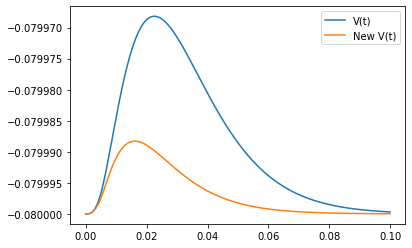

In [111]:
g_exc = 50*10**-9
g_inh = 200*10**-9

def synaptic_current_new(voltage, g_syn, mode="inh"):
    return g_syn*(voltage - e_syn_exc) + g_exc*(voltage - e_syn_exc) + g_inh*(voltage - e_syn_inh)

_,_, the_voltages = euler_voltage(initial_x, initial_g_syn, e_m, t_max, dt, synaptic_current, mode="exc")
_,_, new_voltages = euler_voltage(initial_x, initial_g_syn, e_m, t_max, dt, synaptic_current_new, mode="exc")


# Plot G_syn, Synaptic_current
plt.plot(x_axis, voltages, label = "V(t)")
plt.plot(x_axis, new_voltages, label = "New V(t)")
plt.legend()

-----------------------------
## 3. Two neurons